first we need to clean the data and get insightful insights

In [ ]:
import numpy as np
movies['directors'] = np.where(movies['directors']!='',movies['directors'], np.nan)
movies['movie_generic'] = np.where(movies['movie_generic']!='',movies['movie_generic'], np.nan)
movies['cast'] = np.where(movies['cast']!='',movies['cast'], np.nan)


In [54]:
movies.isnull().sum()

film_link          0
title              0
thumbnail          0
movie_generic     11
release_date       0
description        0
directors        242
cast              50
dtype: int64

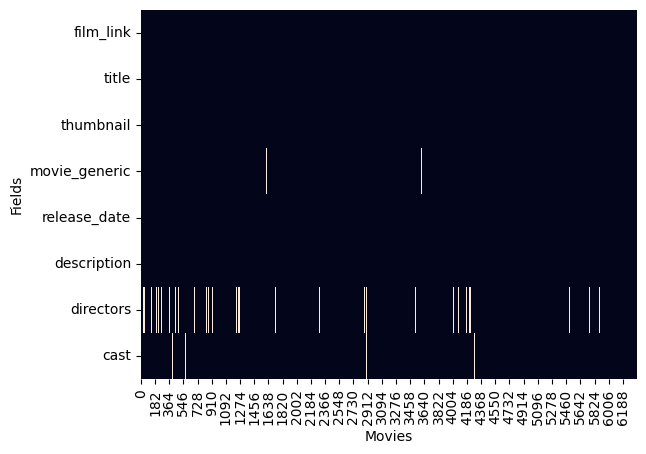

In [55]:
import matplotlib.pyplot as plt
import seaborn as sns

ax = plt.axes()
sns.heatmap(movies.isna().transpose(), cbar=False, ax=ax)
plt.xlabel('Movies')
plt.ylabel('Fields')
plt.show()

In [74]:
clean_genres = movies[~movies['movie_generic'].isna()]
clean_genres.isnull().sum()

film_link          0
title              0
thumbnail          0
movie_generic      0
release_date       0
description        0
directors        242
cast              50
dtype: int64

since we have to money movie_generic values we need to create a good way to handel it one of that is create an encoder
like this one

from sklearn.preprocessing import MultiLabelBinarizer

genres_list = clean_genres['movie_generic'].str.split(',').apply(lambda x:[g.strip()for g in x])

mlb = MultiLabelBinarizer()
genre_df = mlb.fit_transform(genres_list)
genre_df = pd.DataFrame(genre_df, columns=mlb.classes_,index=clean_genres.index)
clean_genres = pd.concat([clean_genres, genre_df], axis=1)



but the most good way is mapping like 
'Action/Adventure': {'Action', 'Adventure'}, so we are go with this one

In [85]:
geners_list = clean_genres['movie_generic'].str.split(',').apply(lambda x:  x[0].strip())
geners_list.value_counts(ascending=False).reset_index().query('count > 10')

,movie_generic,count
0,Comedy,1279
1,Drama,1204
2,Action,1105
3,Horror,542
4,Animation,435
5,Documentary,372
6,Crime,276
7,Thriller,261
8,Adventure,197
9,Biography,195


In [ ]:
clean_genres['categories'] = clean_genres['movie_generic'].str.split(',').apply(lambda x:  x[0].strip())

C:\Users\HP\AppData\Local\Temp\ipykernel_8276\2820074911.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  clean_genres['categories'] = clean_genres['movie_generic'].str.split(',').apply(lambda x:  x[0].strip())


,film_link,title,thumbnail,movie_generic,release_date,description,directors,cast,categories
0,https://ww1.goojara.to/mDJXM2,My Mom Jayne (2025),https://md.goojara.to/10230559.jpg,Documentary,June 2025,Through deeply personal interviews with her si...,NaN,"Jayne Mansfield, Mariska Hargitay, Jayne Marie...",Documentary
1,https://ww1.goojara.to/mYOPN5,200 MPH (2011),https://md.goojara.to/10005812.jpg,"Action, Thriller",April 2011,An amateur racer gets involved in illegal stre...,Kimberley Roper,"AnnaMaria Demara, Jaz Martin, Darren Thomas, J...",Action
2,https://ww1.goojara.to/mqGRzg,The Amateur (2025),https://md.goojara.to/10230527.jpg,"Thriller, Action",April 2025,After his life is turned upside down when his ...,James Hawes,"Rami Malek, Holt McCallany, Danny Sapani, Rach...",Thriller
3,https://ww1.goojara.to/mOeLNL,The One I Love (2014),https://md.goojara.to/10216856.jpg,"Comedy, Drama, Romance",August 2014,Struggling with a marriage on the brink of fal...,Charlie McDowell,"Mark Duplass, Elisabeth Moss, Ted Danson, Kian...",Comedy
4,https://ww1.goojara.to/moVaBJ,Momma's Man (2008),https://md.goojara.to/10026766.jpg,"Comedy, Drama",May 2008,A man who has avoided his wife and child at ho...,Azazel Jacobs,"Matt Boren, Ken Jacobs, Richard Edson, Piero A...",Comedy


In [87]:
clean_genres['words_in_description'] = clean_genres['description'].str.split(' ').str.len()

C:\Users\HP\AppData\Local\Temp\ipykernel_8276\1806085262.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  clean_genres['words_in_description'] = clean_genres['description'].str.split(' ').str.len()


In [100]:
small_words = clean_genres.loc[clean_genres['words_in_description'].between(1,15),'description']
small_words

1       An amateur racer gets involved in illegal stre...
12      A mysterious oriental skull transforms a fathe...
50      The story of one woman's struggle against a na...
60      A road comedy about 2 guys whose mission is to...
70      After his wife is brutally murdered, an ex-cop...
                              ...                        
6315    To save their farm, the resident animals go bo...
6318    Santa Claus must contend with a hitman sent fr...
6332    A documentary on the life of comedian, Chris F...
6338                                                  Sin
6363    A look at the growing disparity between differ...
Name: description, Length: 514, dtype: object

In [103]:
movies_missing15_words = clean_genres[clean_genres['words_in_description']>15]
movies_missing15_words.head()

,film_link,title,thumbnail,movie_generic,release_date,description,directors,cast,categories,words_in_description
0,https://ww1.goojara.to/mDJXM2,My Mom Jayne (2025),https://md.goojara.to/10230559.jpg,Documentary,June 2025,Through deeply personal interviews with her si...,NaN,"Jayne Mansfield, Mariska Hargitay, Jayne Marie...",Documentary,33
2,https://ww1.goojara.to/mqGRzg,The Amateur (2025),https://md.goojara.to/10230527.jpg,"Thriller, Action",April 2025,After his life is turned upside down when his ...,James Hawes,"Rami Malek, Holt McCallany, Danny Sapani, Rach...",Thriller,36
3,https://ww1.goojara.to/mOeLNL,The One I Love (2014),https://md.goojara.to/10216856.jpg,"Comedy, Drama, Romance",August 2014,Struggling with a marriage on the brink of fal...,Charlie McDowell,"Mark Duplass, Elisabeth Moss, Ted Danson, Kian...",Comedy,31
4,https://ww1.goojara.to/moVaBJ,Momma's Man (2008),https://md.goojara.to/10026766.jpg,"Comedy, Drama",May 2008,A man who has avoided his wife and child at ho...,Azazel Jacobs,"Matt Boren, Ken Jacobs, Richard Edson, Piero A...",Comedy,25
5,https://ww1.goojara.to/m2aOZd,Ice Queen (2005),https://md.goojara.to/10182995.jpg,"Horror, Thriller",June 2005,A plane carrying a frozen creature crashes int...,David Giancola,"Ami Chorlton, Harmon Walsh, Noelle Reno, Jenni...",Horror,35


In [117]:
movies_missing15_words['movies_age'] = 2025-(clean_genres['release_date'].str.split(' ').apply(lambda x:int(x[1])))
movies_missing15_words.head()


C:\Users\HP\AppData\Local\Temp\ipykernel_8276\483469762.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  movies_missing15_words['movies_age'] = 2025-(clean_genres['release_date'].str.split(' ').apply(lambda x:int(x[1])))


,film_link,title,thumbnail,movie_generic,release_date,description,directors,cast,categories,words_in_description,movies_age
0,https://ww1.goojara.to/mDJXM2,My Mom Jayne (2025),https://md.goojara.to/10230559.jpg,Documentary,June 2025,Through deeply personal interviews with her si...,NaN,"Jayne Mansfield, Mariska Hargitay, Jayne Marie...",Documentary,33,0
2,https://ww1.goojara.to/mqGRzg,The Amateur (2025),https://md.goojara.to/10230527.jpg,"Thriller, Action",April 2025,After his life is turned upside down when his ...,James Hawes,"Rami Malek, Holt McCallany, Danny Sapani, Rach...",Thriller,36,0
3,https://ww1.goojara.to/mOeLNL,The One I Love (2014),https://md.goojara.to/10216856.jpg,"Comedy, Drama, Romance",August 2014,Struggling with a marriage on the brink of fal...,Charlie McDowell,"Mark Duplass, Elisabeth Moss, Ted Danson, Kian...",Comedy,31,11
4,https://ww1.goojara.to/moVaBJ,Momma's Man (2008),https://md.goojara.to/10026766.jpg,"Comedy, Drama",May 2008,A man who has avoided his wife and child at ho...,Azazel Jacobs,"Matt Boren, Ken Jacobs, Richard Edson, Piero A...",Comedy,25,17
5,https://ww1.goojara.to/m2aOZd,Ice Queen (2005),https://md.goojara.to/10182995.jpg,"Horror, Thriller",June 2005,A plane carrying a frozen creature crashes int...,David Giancola,"Ami Chorlton, Harmon Walsh, Noelle Reno, Jenni...",Horror,35,20


In [121]:
movies_missing15_words.isnull().sum()   

film_link                 0
title                     0
thumbnail                 0
movie_generic             0
release_date              0
description               0
directors               222
cast                     40
categories                0
words_in_description      0
movies_age                0
dtype: int64

In [119]:
(movies_missing15_words.drop(['movies_age','words_in_description'] ,axis=1).to_csv('cleand_movie.csv', index=False))